In [1]:
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

# Add every font at the specified location
font_dir = ["fonts"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
rcParams["font.family"] = "umr10"
rcParams["font.size"] = 14

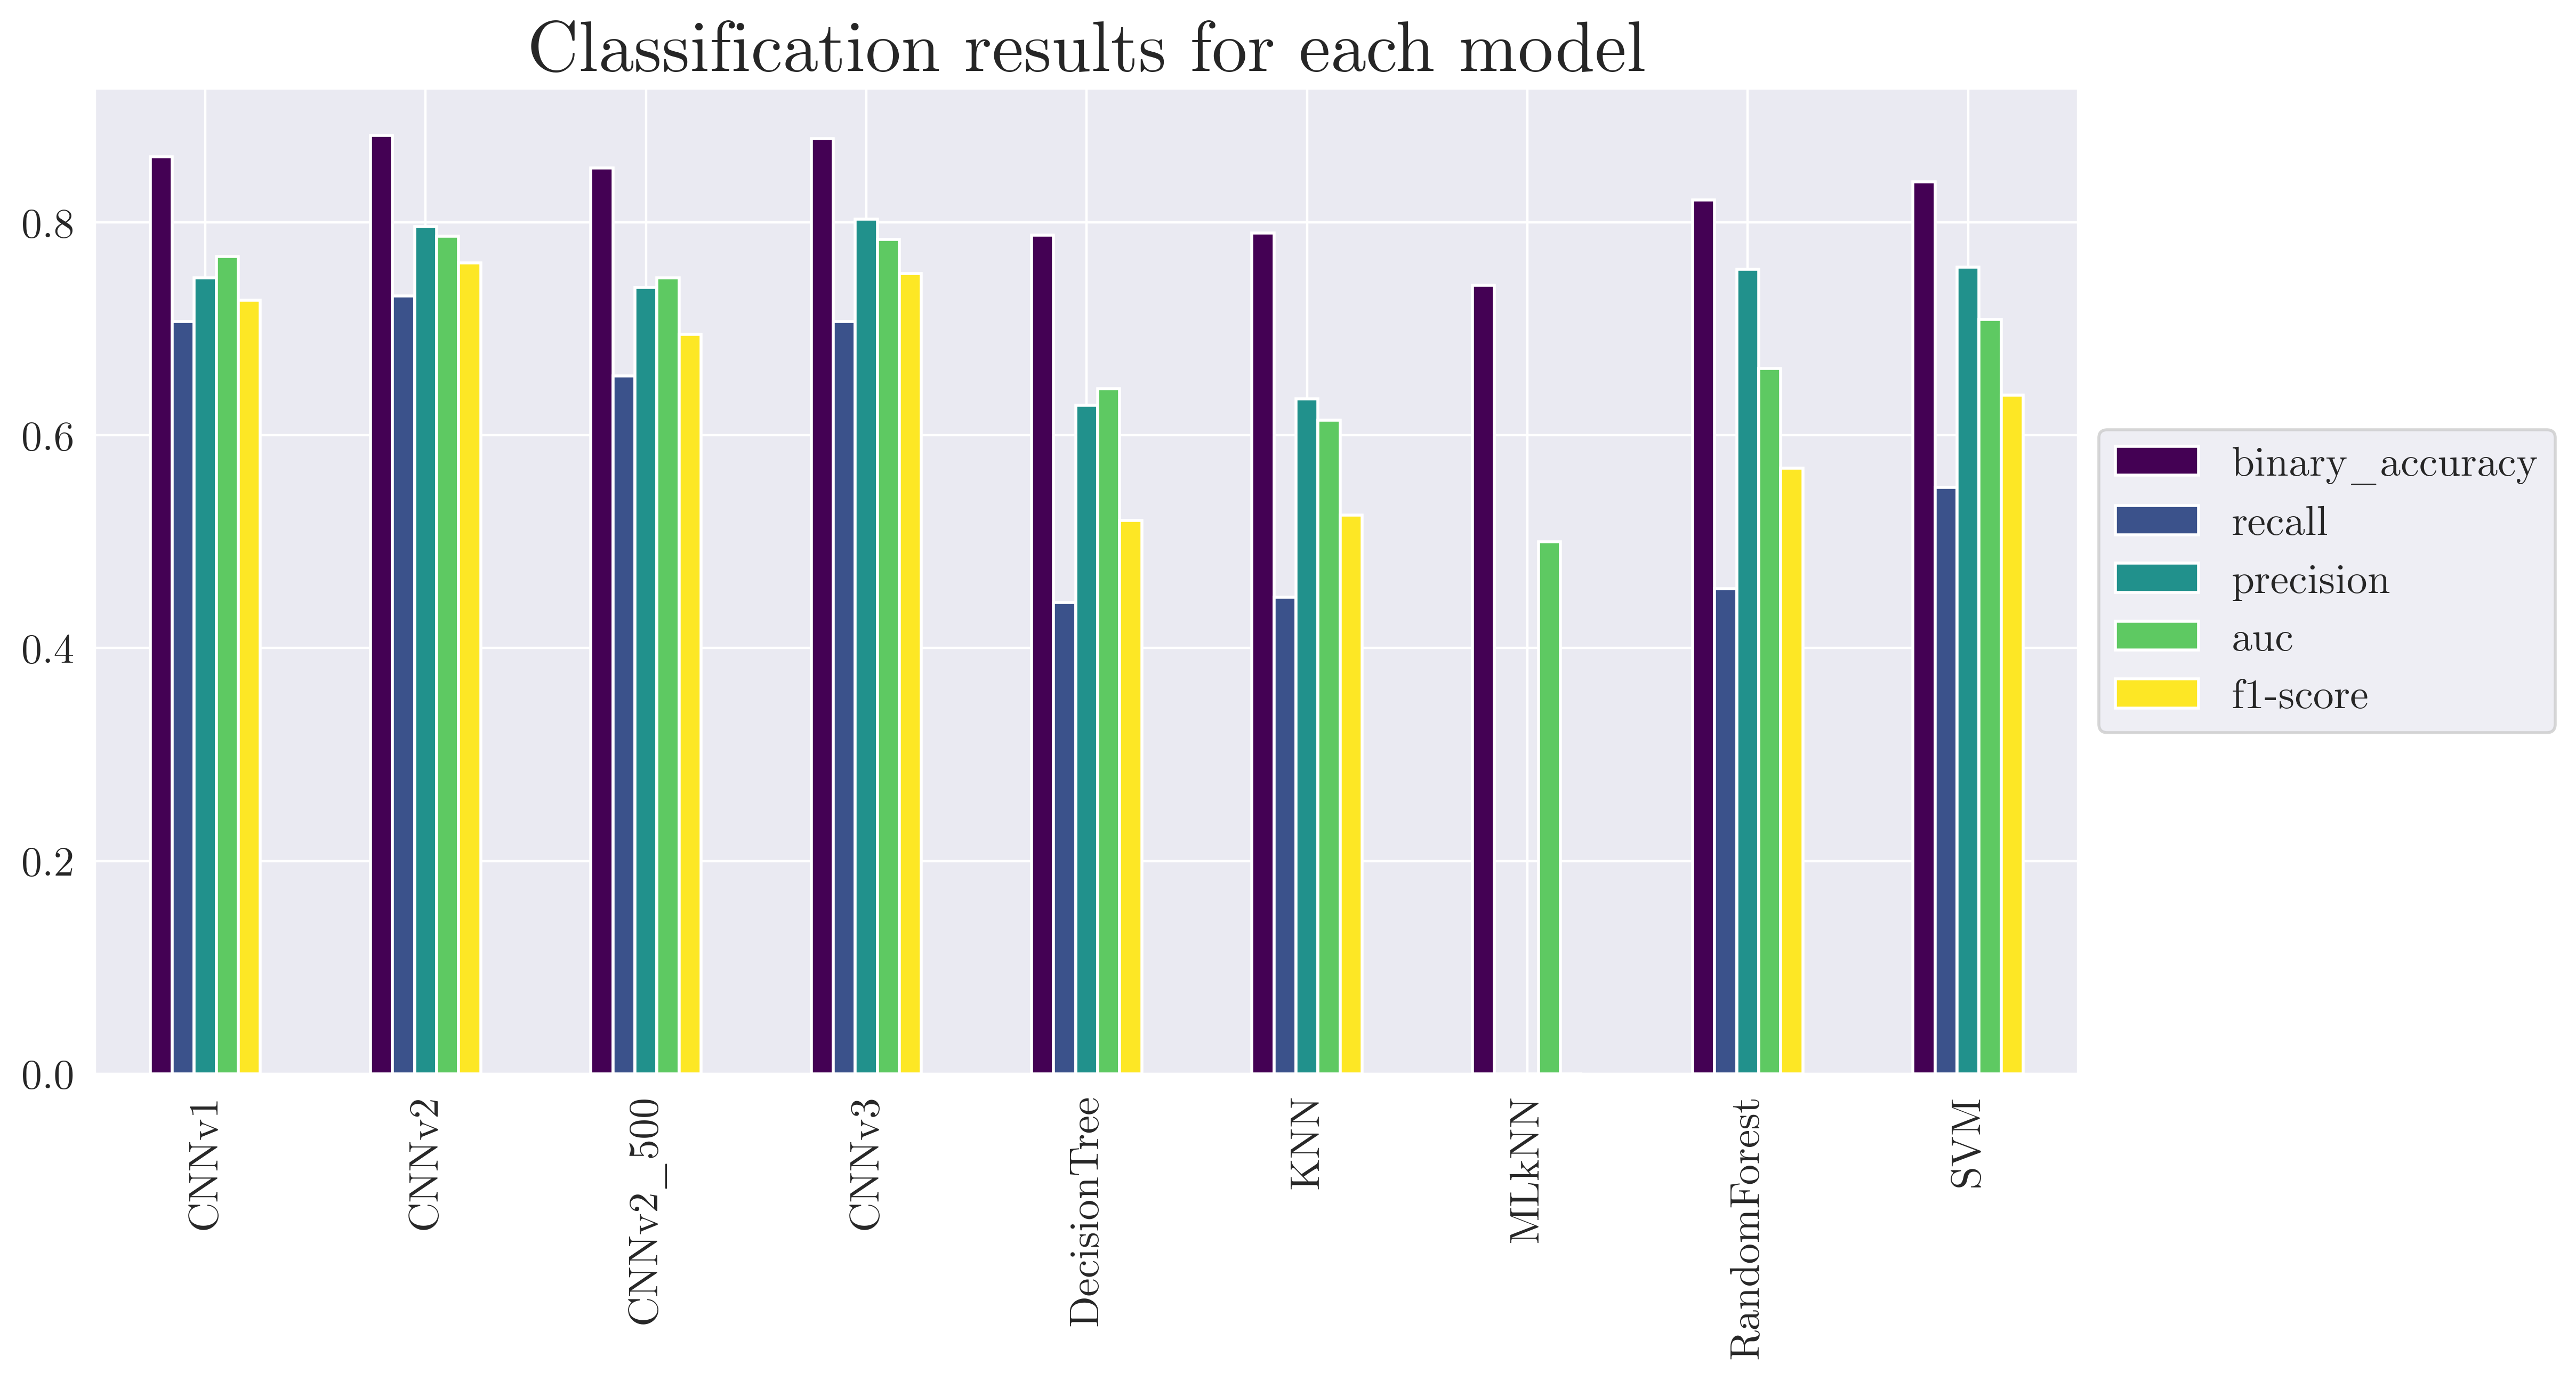

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from os import listdir

results_list = []

for model_name in listdir("saved_data/"):
    f1_score = pd.read_csv(f"saved_data/{model_name}/classification_report.csv")['f1-score'][5]
    model_resuts_df = pd.read_csv(f"saved_data/{model_name}/model_evaluation.csv").drop("Unnamed: 0", axis=1)
    model_resuts_df['f1-score'] = f1_score
    results_list.append(model_resuts_df)

results_df = pd.concat(results_list, axis=0, ignore_index=True)
results_df.index=['CNNv1', 'CNNv2', 'CNNv2_500', 'CNNv3', 'DecisionTree', 'KNN', 'MLkNN', 'RandomForest', 'SVM']

results_df.to_csv("models_comparison/models_metrics_comparison.csv")
results_df.drop('loss', axis=1, inplace=True)

fig = plt.figure(figsize=(12, 6), dpi=400)
plt.title("Classification results for each model", fontsize=24)
results_df.plot(kind='bar', ax=plt.gca(), cmap='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("models_comparison/models_metrics_comparison", bbox_inches="tight")

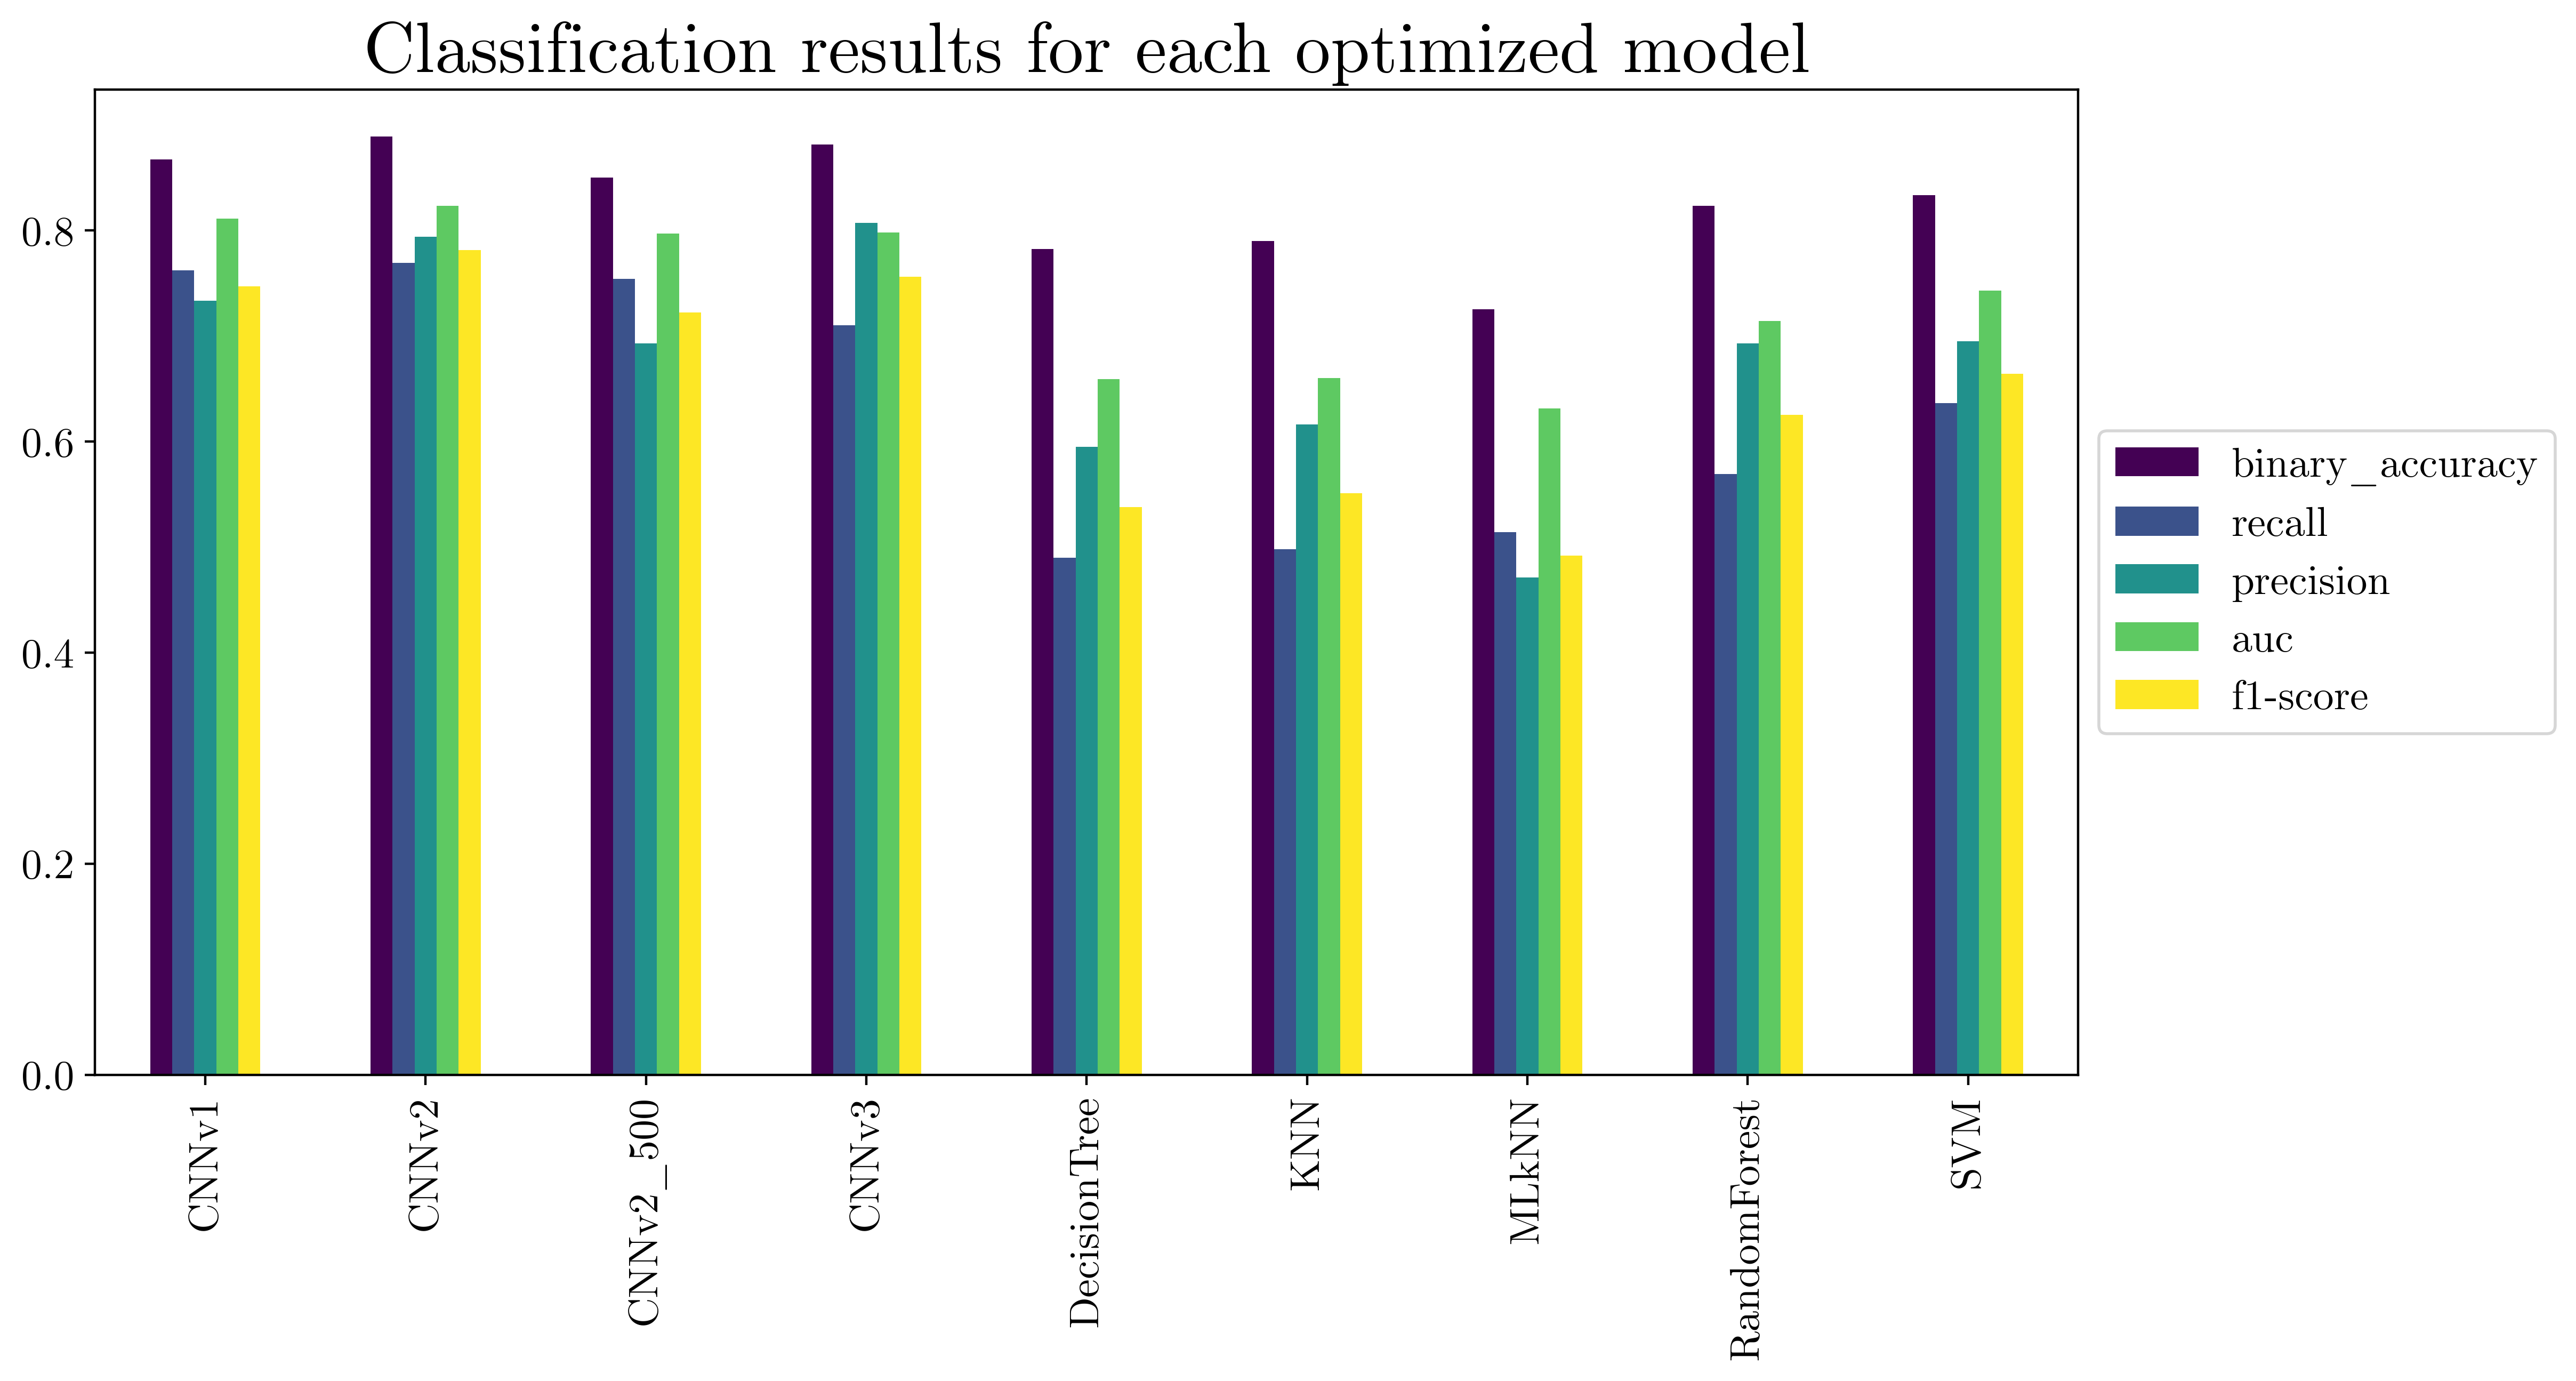

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

from os import listdir

results_list = []

for model_name in listdir("saved_data/"):
    f1_score = pd.read_csv(f"saved_data/{model_name}/classification_report_optimized.csv")['f1-score'][5]
    model_resuts_df = pd.read_csv(f"saved_data/{model_name}/model_evaluation_optimized.csv").drop("Unnamed: 0", axis=1)
    model_resuts_df['f1-score'] = f1_score
    results_list.append(model_resuts_df)

results_df = pd.concat(results_list, axis=0, ignore_index=True)
results_df.index=['CNNv1', 'CNNv2', 'CNNv2_500', 'CNNv3', 'DecisionTree', 'KNN', 'MLkNN', 'RandomForest', 'SVM']
results_df.to_csv("models_comparison/models_metrics_comparison_optimized.csv")
results_df.drop('loss', axis=1, inplace=True)

fig = plt.figure(figsize=(12, 6), dpi=400)
plt.title("Classification results for each optimized model", fontsize=24)
results_df.plot(kind='bar', ax=plt.gca(), cmap='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("models_comparison/models_metrics_comparison_optimized", bbox_inches="tight")

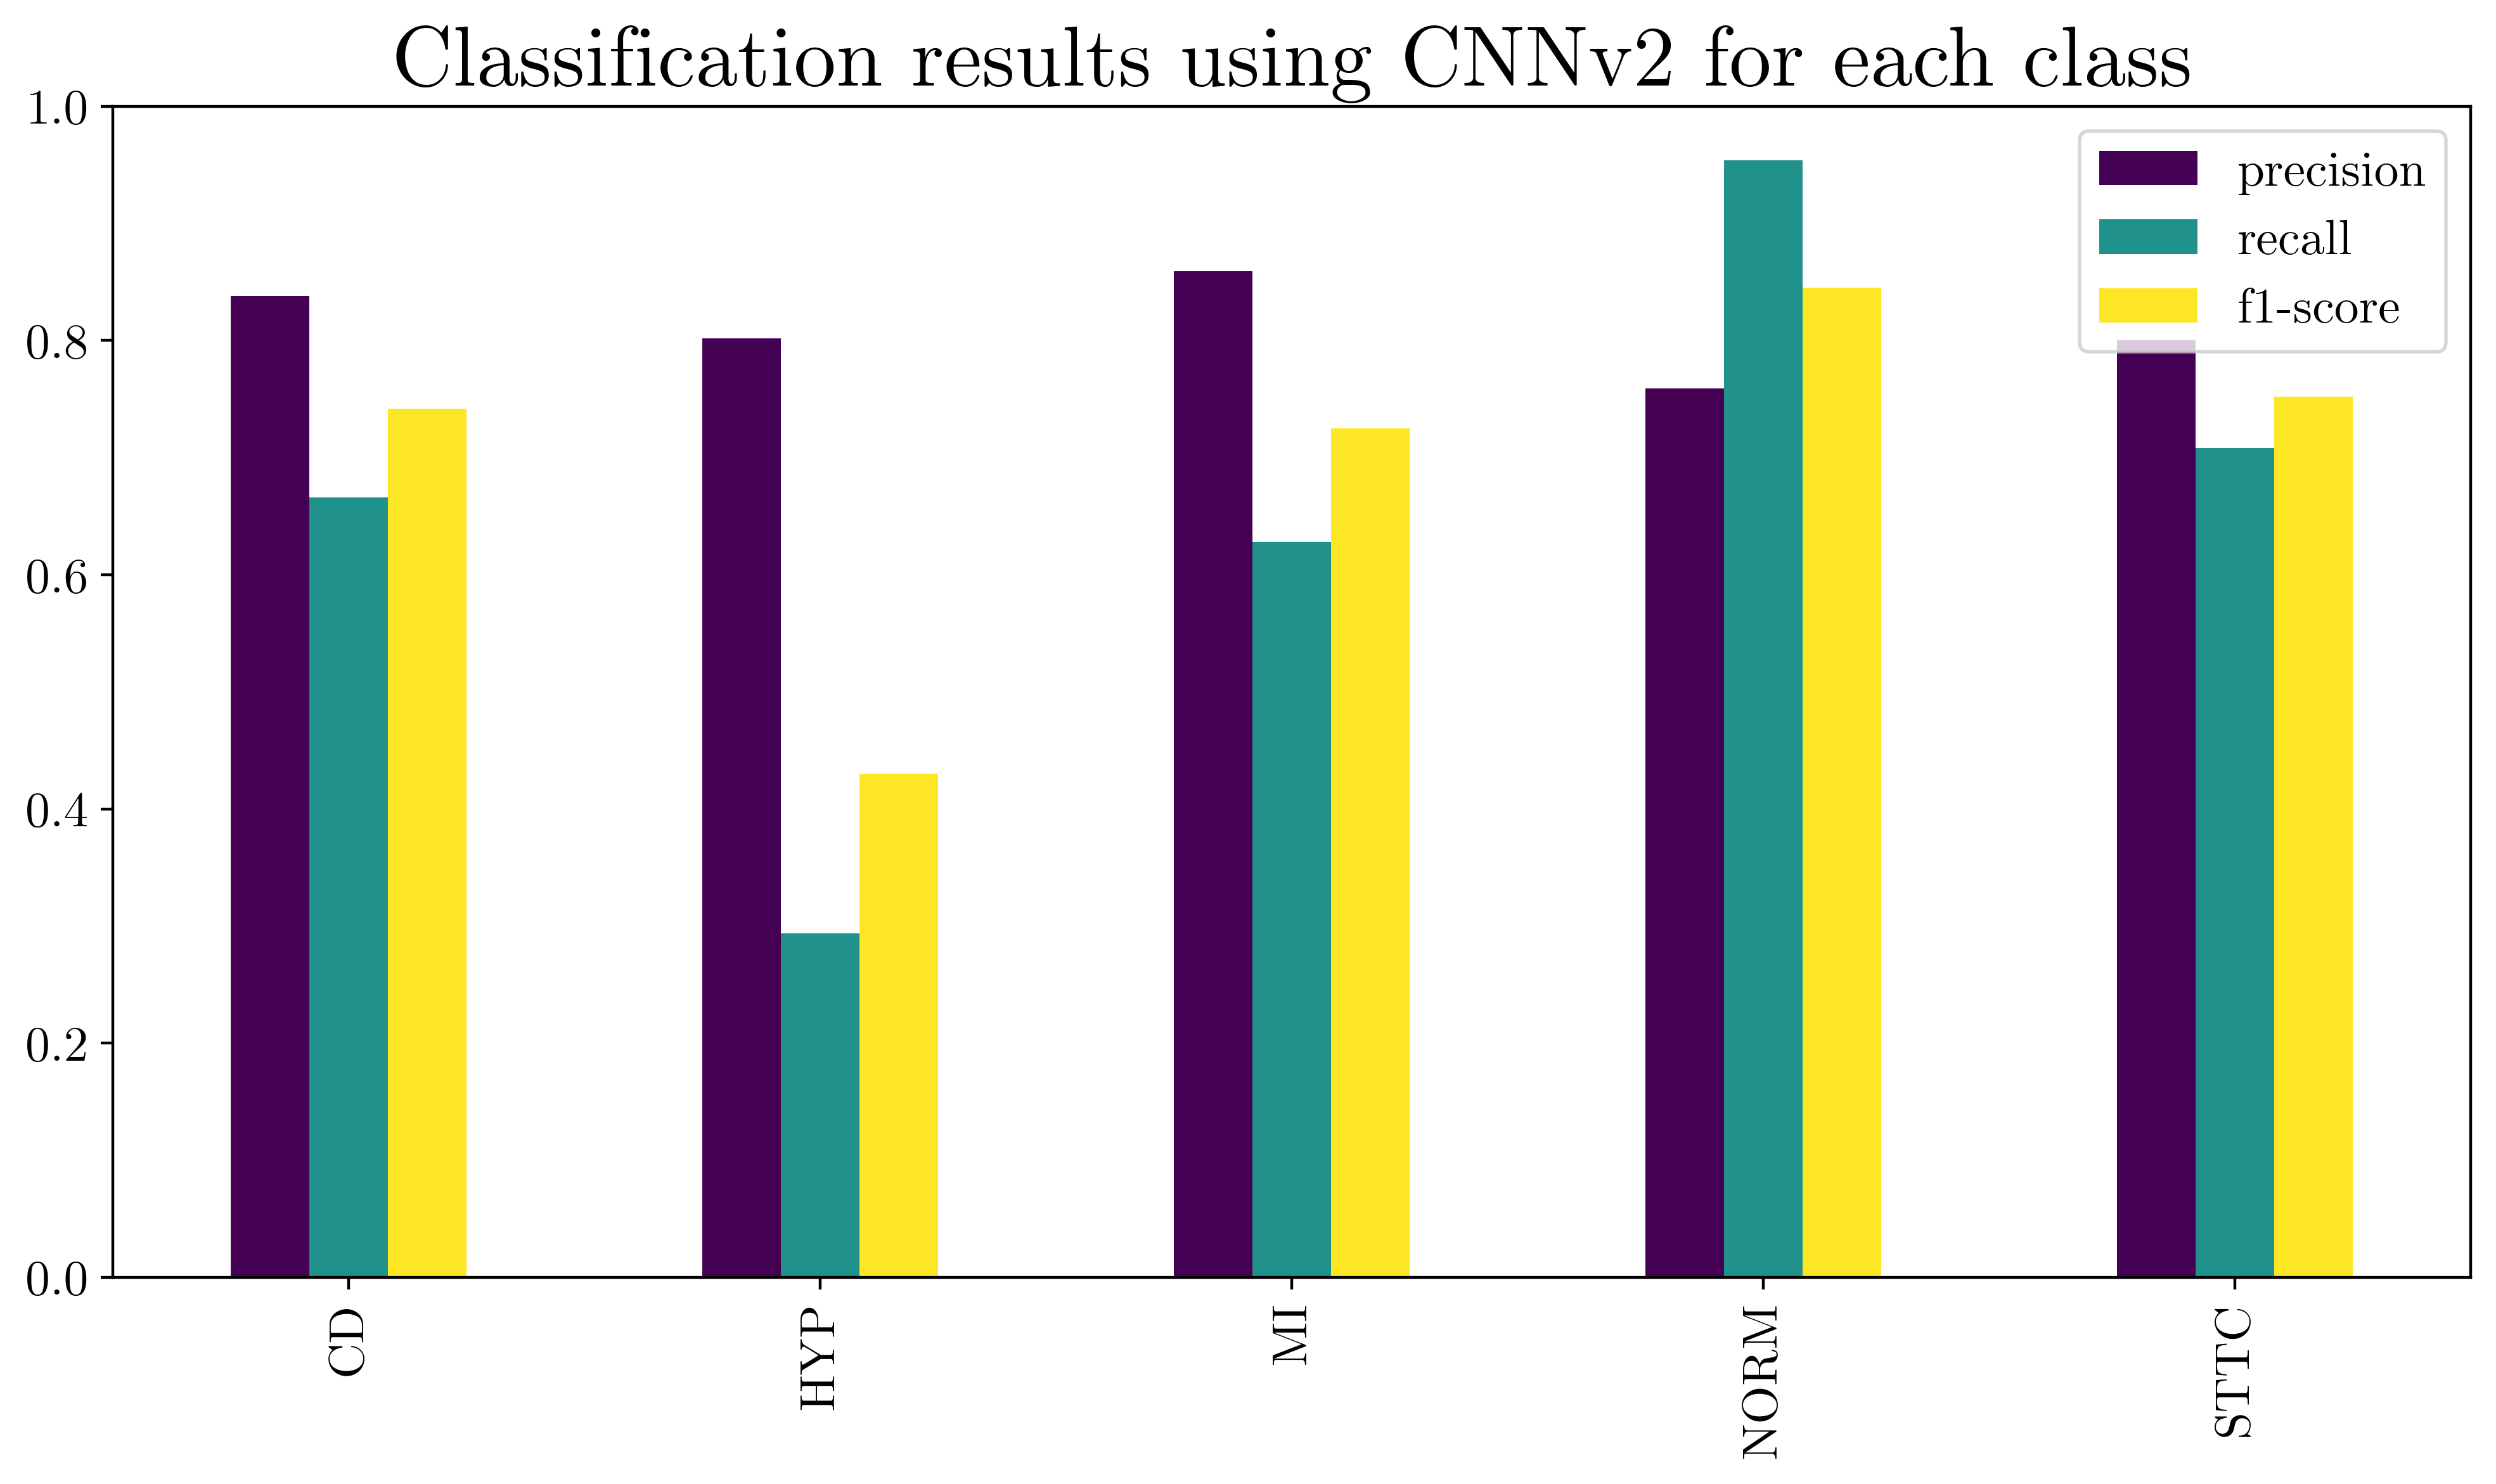

In [9]:
cnn_v2_results = pd.read_csv("saved_data/cnn_v2/classification_report.csv")[:5].drop("Unnamed: 0", axis=1).drop("support", axis=1)
cnn_v2_results.index=['CD', 'HYP', 'MI', 'NORM', 'STTC']

fig = plt.figure(figsize=(12, 6), dpi=400)
plt.title("Classification results using CNNv2 for each class", fontsize=24)
plt.ylim(0, 1)
cnn_v2_results.plot(kind='bar', ax=plt.gca(), cmap='viridis')
plt.savefig("models_comparison/cnn_v2_metrics_comparison", bbox_inches="tight")

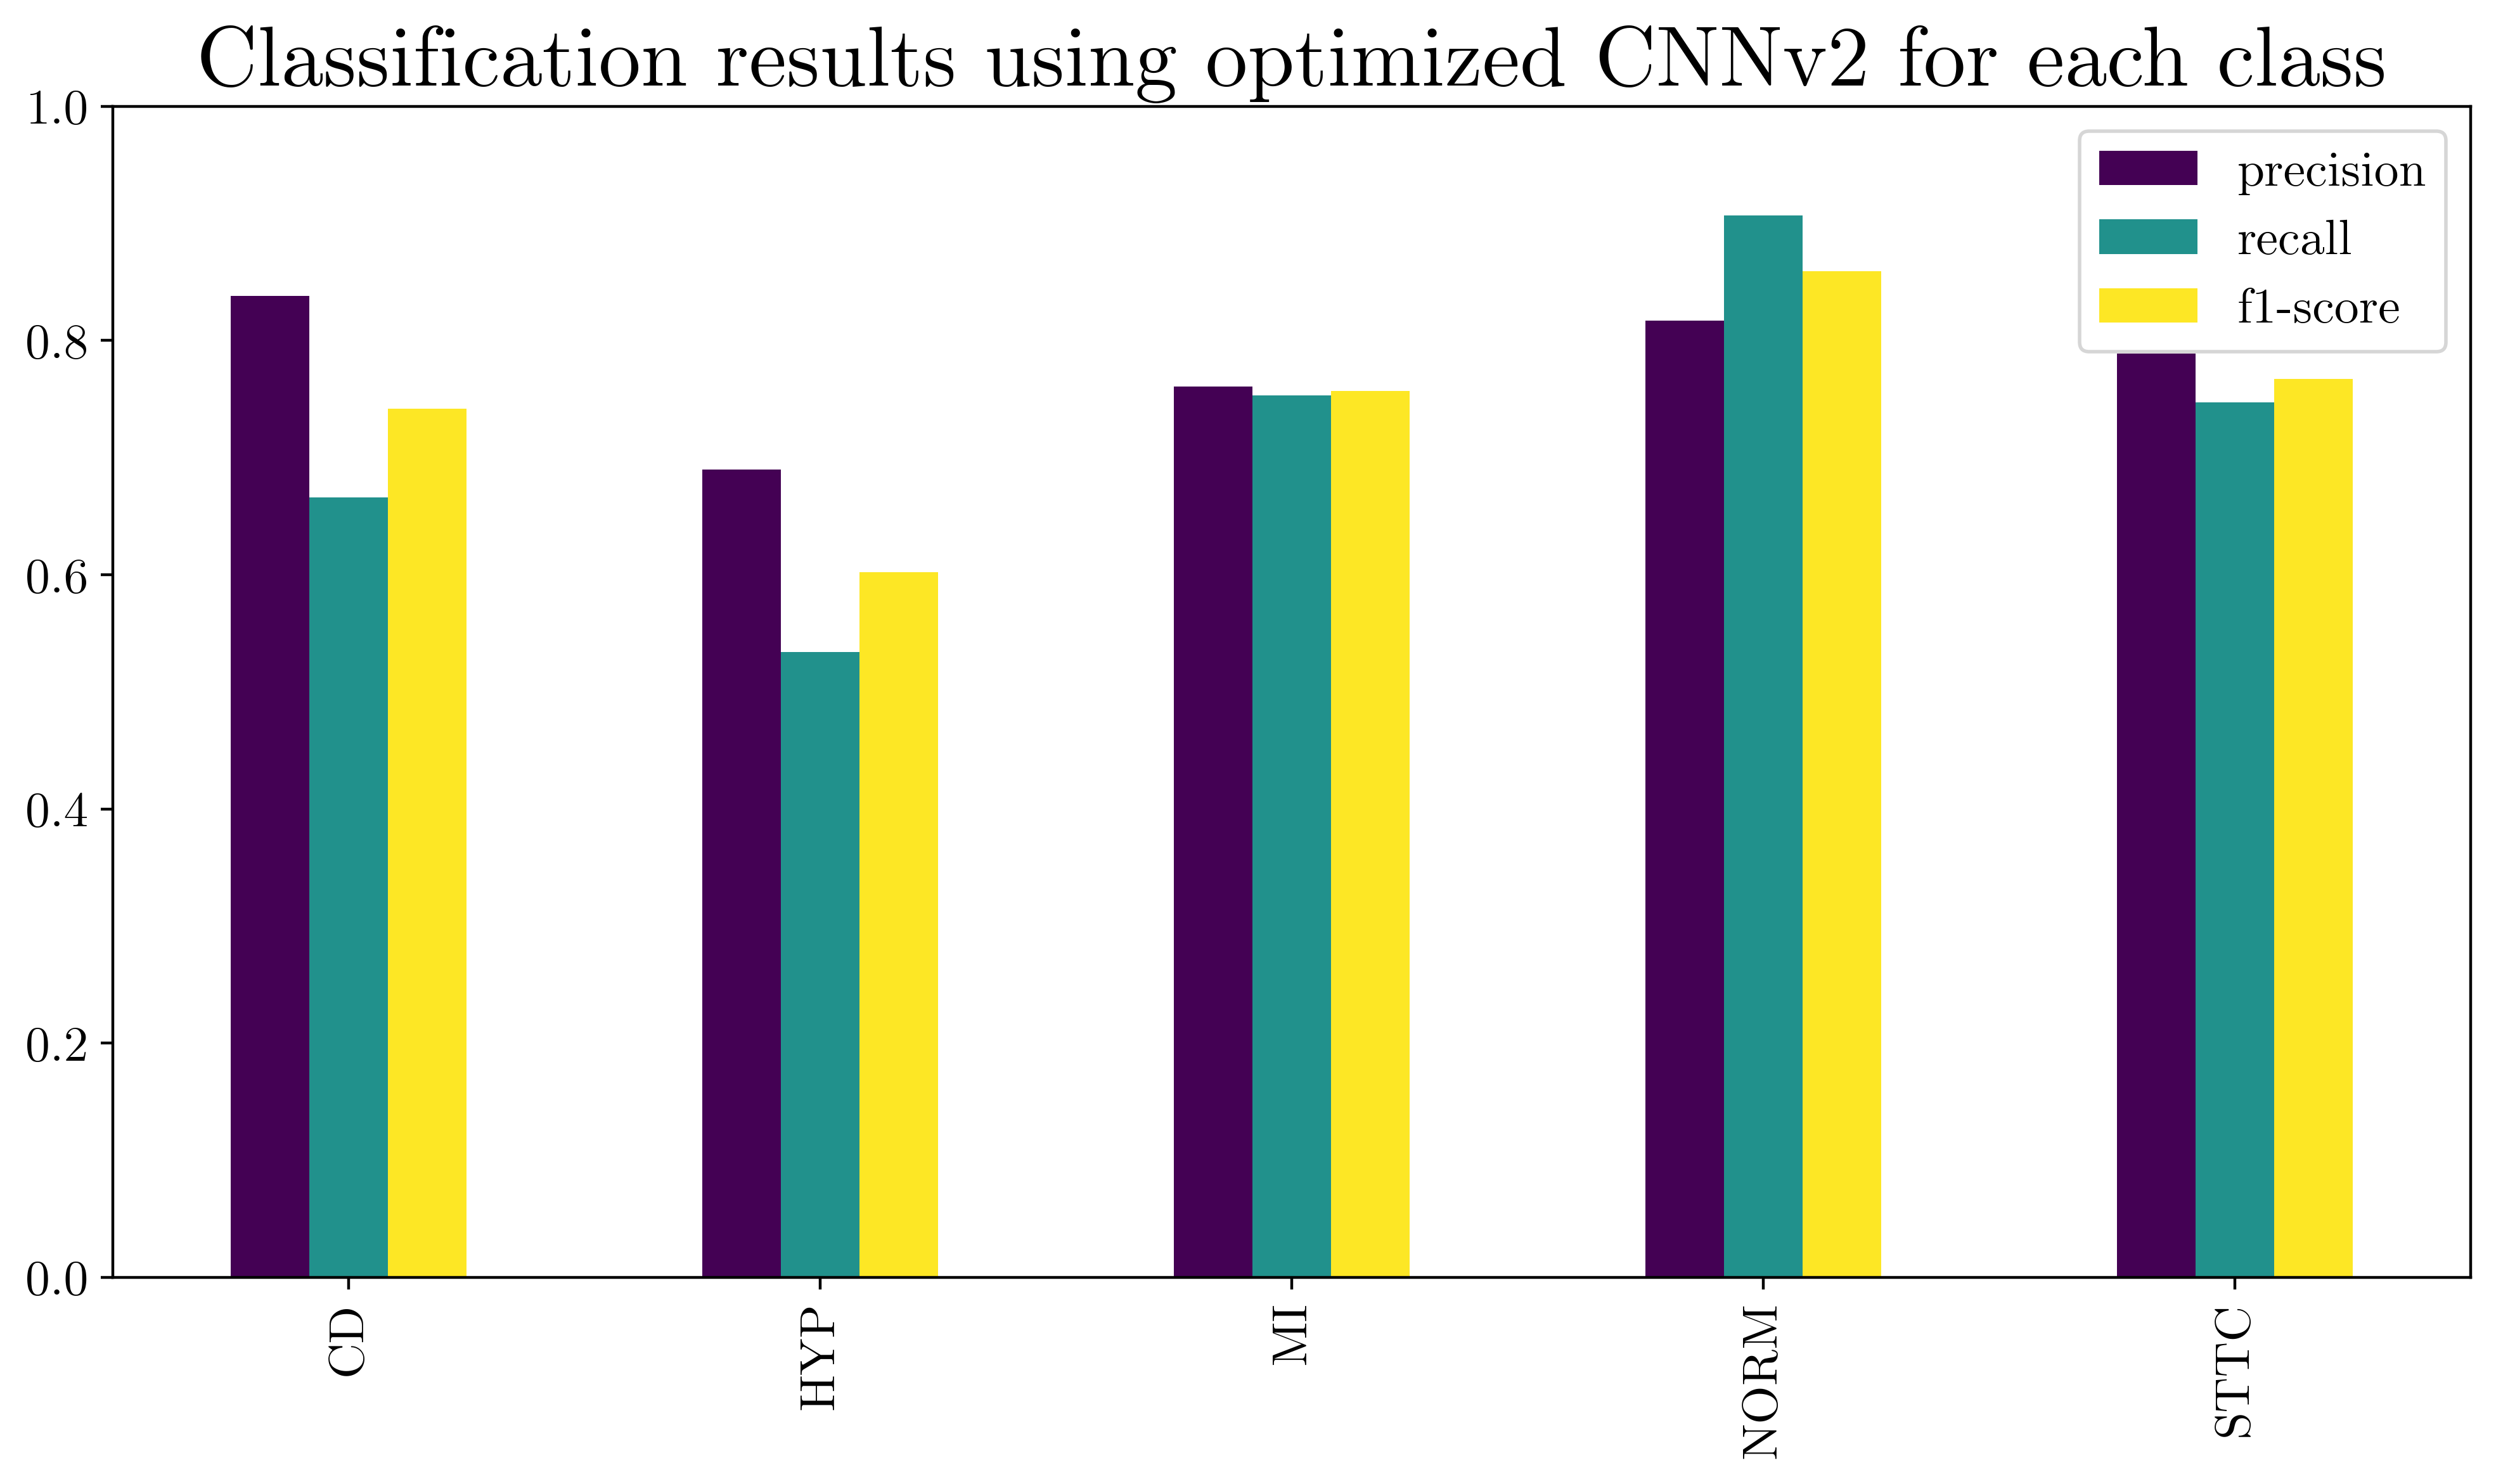

In [10]:
cnn_v2_results = pd.read_csv("saved_data/cnn_v2/classification_report_optimized.csv")[:5].drop("Unnamed: 0", axis=1).drop("support", axis=1)
cnn_v2_results.index=['CD', 'HYP', 'MI', 'NORM', 'STTC']

fig = plt.figure(figsize=(12, 6), dpi=400)
plt.title("Classification results using optimized CNNv2 for each class", fontsize=24)
plt.ylim(0, 1)
cnn_v2_results.plot(kind='bar', ax=plt.gca(), cmap='viridis')
plt.savefig("models_comparison/cnn_v2_metrics_comparison_optimized", bbox_inches="tight")